# TRAINING PROJECT BY SIDHARTH AGGARWAL

## SPAM/HAM CLASSIFIERS USING NATURAL LANGUAGE PROCESSING

In [1]:
!pip install NLTK

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [55]:
#importing libraries
import pandas as pd
import numpy as np
import nltk


In [9]:
df= pd.read_csv("C:/Users/sidha/Downloads/spam.csv")
df.columns=['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# What is the shape of the data
df.shape


(5572, 2)

In [10]:
# How many spam/ham are there
SP=len(df[df['label']=='spam'])
HM=len(df[df['label']=='ham'])
print(SP,HM)

747 4825


In [11]:
# How much missing data is there
LB=df['label'].isnull().sum()
TXT=df['text'].isnull().sum()

print("Number of null in label: ",LB)

print("Number of null in text: ",TXT)

Number of null in label:  0
Number of null in text:  0


# PRE PROCESSING OF DATA

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['CLEAN_TEXT']= df['text'].apply(lambda x:remove_punct(x))

df.head()

,label,text,CLEAN_TEXT
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


### TOKENIZATION

In [16]:
import re

def tokenize(text):
    tokens= re.split('\W',text)
    return tokens
    
df['token_text']= df['CLEAN_TEXT'].apply(lambda x:tokenize(x.lower()))

df.head()

,label,text,CLEAN_TEXT,token_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


### REMOVING STOPWORDS

In [17]:
# Removing stopwords from text

stopwords= nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text

df['nonstop_text']=df['token_text'].apply(lambda x:remove_stopwords(x))

df.head()

,label,text,CLEAN_TEXT,token_text,nonstop_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


### STEMMING

In [22]:

ps= nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

df['stemmed_text']=df['nonstop_text'].apply(lambda x:stemming(x))

df.head()

,label,text,CLEAN_TEXT,token_text,nonstop_text,stemmed_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."



### LEMMATIZING

In [23]:
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

df['text_lemmatized']=df['nonstop_text'].apply(lambda x:lemmatizing(x))

df.head()

,label,text,CLEAN_TEXT,token_text,nonstop_text,stemmed_text,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


### VECTORIZATION

In [27]:
#importing countvector form sklearn library
from sklearn.feature_extraction.text import CountVectorizer

def CLEAN_TEXT(txt):
    txt="".join([word.lower() for word in txt if word not in string.punctuation])
    tokens=re.split('\W',txt)
    txt=[ps.stem(word) for word in tokens if word not in stopwords]
    return txt

count_vect= CountVectorizer(analyzer=CLEAN_TEXT)
X_count=count_vect.fit_transform(df['text'])
print(X_count.shape)
print(count_vect.get_feature_names())

(5572, 8016)
['', '0', '0087040', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '0778620', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '0845281007', '08452810073', '08452810075over18', '0870', '0870062117

In [28]:
#sampling vectorized data
data_sample=df[0:20]

count_vect_sample= CountVectorizer(analyzer=CLEAN_TEXT)
X_counts_sample= count_vect_sample.fit_transform(data_sample['text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 220)
['', '08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '120', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7', '4txt', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'got', 'grant', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joke', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', '

### SPARSE MATRIX

In [29]:
#making matrix from sample of vectorized data
X_counts_sample

<20x220 sparse matrix of type '<class 'numpy.int64'>'
	with 250 stored elements in Compressed Sparse Row format>

In [30]:
x_counts_df= pd.DataFrame(X_counts_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x_counts_df.columns= count_vect_sample.get_feature_names()
x_counts_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,120,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [32]:
#imprting TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect= TfidfVectorizer(analyzer=CLEAN_TEXT)
X_tfidf=tfidf_vect.fit_transform(df['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 8016)
['', '0', '0087040', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '0778620', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '0845281007', '08452810073', '08452810075over18', '0870', '0870062117

In [33]:
#sampling the TF-IDF data
data_sample=df[0:20]

tfidf_vect_sample= TfidfVectorizer(analyzer=CLEAN_TEXT)
X_tfidf_sample= tfidf_vect_sample.fit_transform(data_sample['text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 220)
['', '08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '120', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7', '4txt', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'got', 'grant', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joke', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', '

In [34]:
x_tfidf_df= pd.DataFrame(X_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names()
x_tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,120,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.198423,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.312333,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.184274,0.00,0.000000,0.232325,0.000000,0.000000,0.000000
6,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.297335,0.0000,0.000000,0.221169,0.000000,0.000000,0.000000,0.0000,0.221169,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


# FEATURE CREATION

In [46]:
# Create a feature for text message length

df["length_text"]=df["text"].apply(lambda x:len(x)-x.count(" "))
df.head()

,label,text,CLEAN_TEXT,token_text,nonstop_text,stemmed_text,text_lemmatized,punct%,length_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",9.8,92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",25.0,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",4.7,128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",15.4,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",4.1,49


In [47]:
# Create feature for % of text that is punctuation

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

df["punct%"]=df['text'].apply(lambda x:count_punct(x))

df.head()

,label,text,CLEAN_TEXT,token_text,nonstop_text,stemmed_text,text_lemmatized,punct%,length_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",9.8,92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",25.0,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",4.7,128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",15.4,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",4.1,49


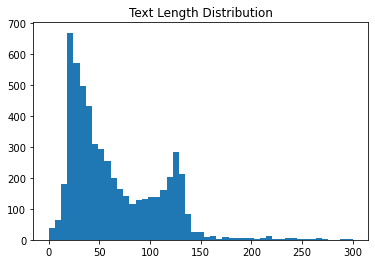

In [56]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.linspace(0,300,50)

plt.hist(df['length_text'],bins)
plt.title('Text Length Distribution')
plt.show()

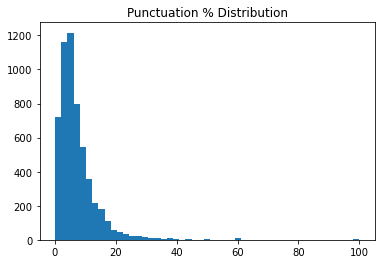

In [57]:
bins=np.linspace(0,100,50)

plt.hist(df['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

# Building Machine Learning Classifiers using Random Forest Model


In [51]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

df['length_text']=df['text'].apply(lambda x:len(x)-x.count(" "))
df["punct%"]=df['text'].apply(lambda x:count_punct(x))

df.head()

,label,text,CLEAN_TEXT,token_text,nonstop_text,stemmed_text,text_lemmatized,punct%,length_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",9.8,92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",25.0,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",4.7,128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",15.4,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",4.1,49


In [52]:
def CLEAN_TEXT(txt):
    txt="".join([word.lower() for word in txt if word not in string.punctuation])
    tokens=re.split('\W',txt)
    txt=[ps.stem(word) for word in tokens if word not in stopwords]
    return txt


tfidf_vect= TfidfVectorizer(analyzer=CLEAN_TEXT)
X_tfidf= tfidf_vect.fit_transform(df['text'])

In [53]:
X_features= pd.concat([df['length_text'], df['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,length_text,punct%,0,1,2,3,4,5,6,7,...,8006,8007,8008,8009,8010,8011,8012,8013,8014,8015
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model using KFoled cross validation

In [58]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)

cross_val_score(rf, X_features, df['label'], cv=k_fold, scoring='accuracy',n_jobs=1)

array([0.97578475, 0.97757848, 0.97486535, 0.96319569, 0.96947935])